## Zomato Restaurant

#### Project Description

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

#### Data Storage:

This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables:
- Country code
- Country name

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:
- ```Restaurant Id:``` Unique id of every restaurant across various cities of the world
- ```Restaurant Name:``` Name of the restaurant
- ```Country Code:``` Country in which restaurant is located
- ```City:``` City in which restaurant is located
- ```Address:``` Address of the restaurant
- ```Locality:``` Location in the city
- ```Locality Verbose:``` Detailed description of the locality
- ```Longitude:``` Longitude coordinate of the restaurant&#39;s location
- ```Latitude:``` Latitude coordinate of the restaurant&#39;s location
- ```Cuisines:``` Cuisines offered by the restaurant
- ```Average Cost for two:``` Cost for two people in different currencies ��
- ```Currency:``` Currency of the country
- ```Has Table booking:``` yes/no
- ```Has Online delivery:``` yes/ no
- ```Is delivering:``` yes/ no
- ```Switch to order menu:``` yes/no
- ```Price range:``` range of price of food
- ```Aggregate Rating:``` Average rating out of 5
- ```Rating color:``` depending upon the average rating color
- ```Rating text:``` text on the basis of rating of rating
- ```Votes:``` Number of ratings casted by people

Problem statement : In this dataset predict 2 things –
1) Average Cost for two
2) Price range
```

Hint : Use pandas merge operation -- pd.merge (df1,df2) to combine two datasets


Dataset Link-  
- https://github.com/dsrscientist/dataset4/blob/main/Country-Code.xlsx
- https://github.com/dsrscientist/dataset4/blob/main/zomato.csv


### Importing Necesssary Liraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import r2_score,mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
###############################REGRESSION#############################################
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesClassifier,ExtraTreesRegressor 
from xgboost import XGBRegressor
##############################CLASSIFICATION##########################################
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


### Loading and merging Both dataset

In [2]:
df1 = pd.read_csv('zomato.csv', encoding='latin1')
df2 = pd.read_excel('Country-Code.xlsx')
df = pd.merge(df2,df1,how='left',on='Country Code')

In [3]:
df.head(2)

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71


### EDA(Exploratory Data Analysis)

In [4]:
#checking the shape of dataset
print("There are {} rows and {} columns respectively present in the dataset.".format(*df.shape))

There are 9551 rows and 22 columns respectively present in the dataset.


In [5]:
# checking columns in Dataset
print("These are the columns present in the dataset:  \n\n",df.columns)

These are the columns present in the dataset:  

 Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [6]:
# checking duplicate values in the dataset
print("There are {} duplicates present in the dataset".format(df.duplicated().sum()))

There are 0 duplicates present in the dataset


In [7]:
# checking null values in the dataset
print("There are {} Nulls present in the dataset".format(df.isnull().sum().sum()))

There are 9 Nulls present in the dataset


In [8]:
#checking in which column the null values are present
df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

9 null values are present in ```Cousines``` column

In [9]:
# Because Cousine column is categorical column so will fill nulls by mode method
df['Cuisines'].fillna(df['Cuisines'].mode()[0],inplace=True)

<AxesSubplot:>

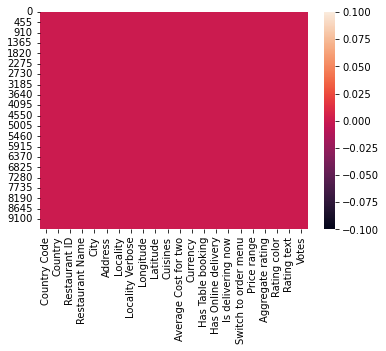

In [10]:
# Heatmap of null values
sns.heatmap(df.isnull())

now there is no null values

In [11]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   object 
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9551 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

In [12]:
#Descriptive Analysis
df.describe()

,Country Code,Restaurant ID,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,9.051128e+06,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,8.791521e+06,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,5.300000e+01,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.019625e+05,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,6.004089e+06,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,1.835229e+07,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,1.850065e+07,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


#### Important Observations

1. **Country Code**: 
   - The `Country Code` column contains values ranging from 1 to 216, indicating that there are multiple countries represented in the dataset.
   - The most common value appears to be 1, which suggests that a single country might dominate the dataset.

2. **Restaurant ID**:
   - The `Restaurant ID` column contains a wide range of values, with a minimum value of 53 and a maximum value of 18,500,650.
   - The data appears to be highly skewed, with a large standard deviation (8,791.

3. **Longitude and Latitude**:
   - The `Longitude` and `Latitude` columns appear to contain geographic coordinates.
   - The longitude values range from approximately -157.95 to 174.83, while the latitude values range from approximately -41.33 to 55.98.

4. **Average Cost for Two**:
   - The `Average Cost for Two` column shows a wide range of values, with a minimum of 0 and a maximum of 800,000.
   - The data appears to be right-skewed, with a high standard deviation (16,121).

5. **Price Range**:
   - The `Price Range` column has values ranging from 1 to 4, indicating different price ranges for restaurants.
   - The most common price range appears to be 2.

6. **Aggregate Rating**:
   - The `Aggregate Rating` column has ratings ranging from 0.0 to 4.9.
   - The mean rating is approximately 2.67.

7. **Votes**:
   - The `Votes` column indicates the number of votes received by restaurants, with values ranging from 0 to 10,934.
   - The data appears to be right-skewed, with a high standard deviation (430).

These observations provide a general overview of the dataset's key statistics and characteristics.


In [13]:
# Checking Unique values in columns
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('*'*50)

Country Code
[  1  14  30  37  94 148 162 166 184 189 191 208 214 215 216]
**************************************************
Country
['India' 'Australia' 'Brazil' 'Canada' 'Indonesia' 'New Zealand'
 'Phillipines' 'Qatar' 'Singapore' 'South Africa' 'Sri Lanka' 'Turkey'
 'UAE' 'United Kingdom' 'United States']
**************************************************
Restaurant ID
[ 3400025  3400341  3400005 ... 17697332 17694056 17559793]
**************************************************
Restaurant Name
['Jahanpanah' 'Rangrezz Restaurant' 'Time2Eat - Mama Chicken' ...
 'Tokyo Japanese Steak House' "Theo Yianni's Authentic Greek Restaurant"
 "Fishpatrick's Crabby Cafe"]
**************************************************
City
['Agra' 'Ahmedabad' 'Allahabad' 'Amritsar' 'Aurangabad' 'Bangalore'
 'Bhopal' 'Bhubaneshwar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Dehradun'
 'Faridabad' 'Ghaziabad' 'Goa' 'Gurgaon' 'Guwahati' 'Hyderabad' 'Indore'
 'Jaipur' 'Kanpur' 'Kochi' 'Kolkata' 'Lucknow' 'Ludhiana' '

In [14]:
# Checking value counts 
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print('*'*50)

Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: Country Code, dtype: int64
**************************************************
Country
India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64
**************************************************
Restaurant ID
3400025     1
309811      1
18460981    1
18287389    1
1629        1
           ..
4096        1
18358700    1
2217        1
18398571    1
17559793    1
Name: Restaurant ID, Length: 9551, dtype: int64
**************************************************
Restaurant Name
Cafe Cof

In [15]:
#Selecting Unnecessaru columns by above analysis
unnecessary_columns = ['Restaurant ID',#This is unique for every restorent
                       'Address',#this is unique for every restorent
                       'Switch to order menu',#there is only one value NO
                       'Locality Verbose',#we have also city longitude latitude so we dont need this
                       'Locality']##we have also city longitude latitude so we dont need this

In [16]:
#deleting unnecessary_columns columns
df.drop(unnecessary_columns,axis=1,inplace=True)

In [17]:
df.head()

,Country Code,Country,Restaurant Name,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,Jahanpanah,Agra,78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,3,3.9,Yellow,Good,140
1,1,India,Rangrezz Restaurant,Agra,0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,2,3.5,Yellow,Good,71
2,1,India,Time2Eat - Mama Chicken,Agra,78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,2,3.6,Yellow,Good,94
3,1,India,Chokho Jeeman Marwari Jain Bhojanalya,Agra,77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,No,2,4.0,Green,Very Good,87
4,1,India,Pinch Of Spice,Agra,78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,3,4.2,Green,Very Good,177


In [18]:
# Saperating Numerical Discreate Contineous   Categorical  and Datetime columns
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
datetime_feature = [feature for feature in df.columns if pd.api.types.is_datetime64_any_dtype(df[feature])]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))
print("Datetime Feature Count: {}".format(len(datetime_feature)))

Numerical Features Count 7
Discrete feature Count 2
Continuous feature Count 5
Categorical feature Count 10
Datetime Feature Count: 0


In [19]:
# Get the indices of the top 60 cuisines
top_cuisine_indices = df.Cuisines.value_counts().index[:65]

# Use .loc to access the rows with the top cuisines
df = df[df.Cuisines.isin(top_cuisine_indices)]

In [20]:
df

,Country Code,Country,Restaurant Name,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,Jahanpanah,Agra,78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,3,3.9,Yellow,Good,140
1,1,India,Rangrezz Restaurant,Agra,0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,2,3.5,Yellow,Good,71
2,1,India,Time2Eat - Mama Chicken,Agra,78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,2,3.6,Yellow,Good,94
4,1,India,Pinch Of Spice,Agra,78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,3,4.2,Green,Very Good,177
6,1,India,Peshawri - ITC Mughal,Agra,78.044095,27.160934,"North Indian, Mughlai",2500,Indian Rupees(Rs.),No,No,No,4,4.3,Green,Very Good,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9532,216,United States,Hong Kong Chinese Restaurant,Waterloo,-92.432200,42.513300,Chinese,10,Dollar($),No,No,No,1,3.8,Yellow,Good,136
9542,216,United States,Chapala,Waterloo,-92.323032,42.477281,Mexican,25,Dollar($),No,No,No,2,3.6,Yellow,Good,69
9543,216,United States,Galleria de Paco,Waterloo,-92.339721,42.494908,American,40,Dollar($),No,No,No,3,3.6,Yellow,Good,86
9544,216,United States,Golden China,Waterloo,-92.356066,42.458979,Chinese,10,Dollar($),No,No,No,1,3.7,Yellow,Good,73


## Univariate Analysis

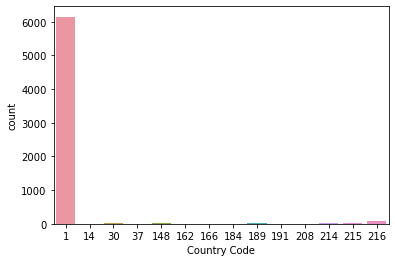

In [21]:
sns.countplot(x='Country Code',data=df)
plt.show()

Ovservation:
    
1 is country code of india and count of indian rastaurant is higher then other 

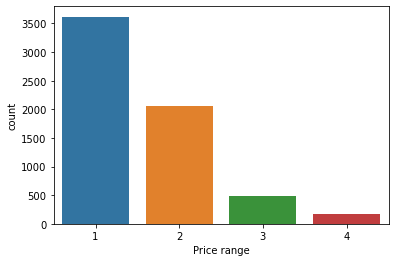

In [22]:
sns.countplot(x='Price range',data=df)
plt.show()

Ovservation:

We can see, Price range of 1 has maximum price range followed by 2.

All Price range are decreasing in order.

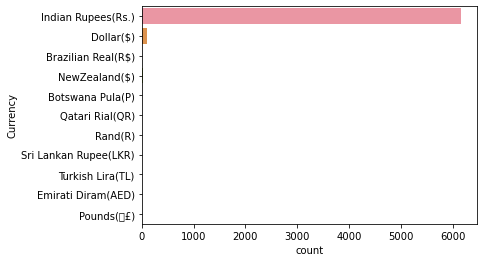

In [23]:
sns.countplot(y='Currency',data=df)
plt.show()

"From the analysis of the 'Currency' column, it is evident that Indian Rupees (Rs.) is the most commonly used currency, indicating that Zomato's primary business presence is in India. This is further supported by the large number of restaurants with 'Country Code' 1, which corresponds to India. Additionally, the presence of Dollar($) as the second most used currency suggests that Zomato also operates in regions where the US Dollar is the preferred currency.

The relatively low usage of other currencies in the dataset implies that Zomato may not have a significant presence or activity in those countries, as compared to its operations in India and regions where the US Dollar is used as the currency of choice."

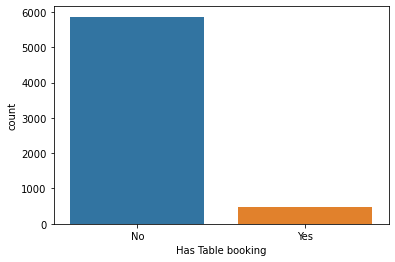

In [24]:
sns.countplot(x='Has Table booking',data=df)
plt.show()

"While analyzing the 'Has Table booking' column, it's evident that the majority of restaurants listed on Zomato do not provide table booking services ('No'). However, there are exceptions where table booking is available ('Yes').

One possible explanation for this discrepancy is that Zomato may have its own restaurants or partner with certain establishments where table booking services are offered. In such cases, Zomato's platform could facilitate reservations at these specific dining venues. This observation suggests that Zomato's services may extend beyond being a mere restaurant listing platform, potentially encompassing its own or affiliated dining establishments where patrons can book tables."


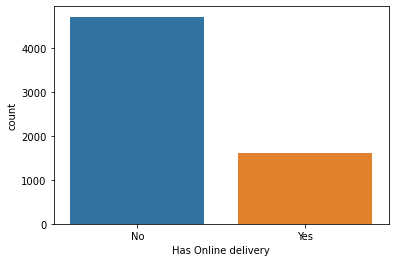

In [25]:
sns.countplot(x='Has Online delivery',data=df)
plt.show()

"It is noticeable from the analysis of the 'Has Online delivery' column that the majority of the listed restaurants on Zomato do not offer online delivery services ('No'). However, there are specific places where online delivery is indeed available ('Yes').

This discrepancy suggests that while Zomato provides a comprehensive restaurant listing platform, the availability of online delivery services varies by location. In some areas, Zomato may have established partnerships with restaurants that offer online delivery, enabling customers to order food online. In contrast, in many other locations, online delivery services may not be as prevalent or may not have been integrated into the Zomato platform to the same extent."

In [26]:
## Which countries do have online deliveries option
country=df[df['Has Online delivery']=='Yes'].Country.value_counts()

In [27]:
country

India    1600
UAE         5
Name: Country, dtype: int64

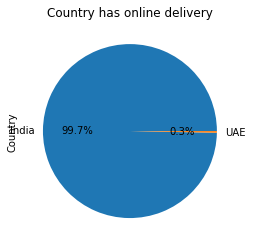

In [28]:
country.plot.pie(autopct = '%1.1f%%')
plt.title('Country has online delivery')
plt.show()

"An insightful observation arises when comparing the availability of online delivery services in different countries represented in the dataset. India stands out with a significantly high rate of online delivery availability, accounting for 99.7% of the restaurants. This indicates that Zomato's online delivery services are widely established and embraced in the Indian market.

In contrast, the United Arab Emirates (UAE) shows a notably lower rate of online delivery availability, at just 0.3%. This suggests that Zomato's online delivery services are less prominent in the UAE market.

Interestingly, the remaining countries in the dataset seem to have minimal to no representation of online delivery services, indicating that Zomato's online delivery feature is not as extensively utilized or offered in these regions compared to India and UAE. This observation sheds light on the varying adoption and success of Zomato's online delivery services in different parts of the world."






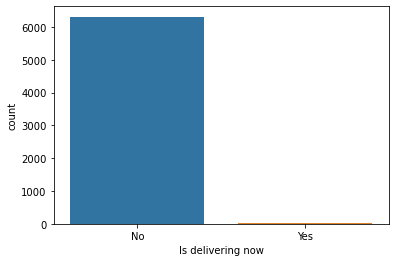

In [29]:
sns.countplot(x='Is delivering now',data=df)
plt.show()

"It's notable from the analysis that the majority of listed places do not currently offer the 'Is delivering now' service ('No'). This indicates that a significant portion of the restaurants and eateries listed on Zomato do not have real-time delivery services available at the time of data collection.

While Zomato provides a vast array of restaurant information, including menus and ratings, it's important to recognize that the 'Is delivering now' feature is not widely accessible across all locations. It's possible that the availability of real-time delivery services varies based on factors such as restaurant partnerships and local delivery infrastructure, leading to the observed difference in service availability."

In [30]:
city_values = df.City.value_counts().values
city_index = df.City.value_counts().index

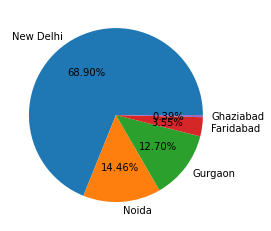

In [31]:
plt.pie(city_values[:5],labels=city_index[:5],autopct='%1.2f%%')
plt.show()

"It's evident from the analysis that a significant portion of Zomato's restaurant listings, approximately 68.90%, is concentrated in New Delhi, followed by Noida. Notably, both New Delhi and Noida are prominent cities within the Delhi NCR (National Capital Region) region.

This observation strongly indicates that Zomato's primary focus and operational presence are prominently centered in the Delhi NCR region. The high representation of restaurants in these cities suggests that Zomato's platform is extensively utilized and established in this specific geographic area, underscoring the platform's strong foothold within the Delhi NCR region."



In [32]:
# Find top 10 Cuisine
cuisin_val=df.Cuisines.value_counts().values
cuisin_index = df.Cuisines.value_counts().index

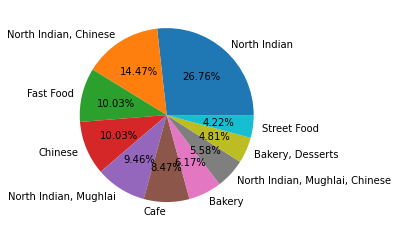

In [33]:
plt.pie(cuisin_val[:10],labels=cuisin_index[:10],autopct='%1.2f%%')
plt.show()

"It's evident from the analysis that North Indian cuisine is the most preferred among customers, with approximately 26.76% of customers favoring it. Following closely behind is Chinese cuisine, which is also highly popular among customers. These two cuisines dominate the top spots in the list of customer preferences.

### Bivariate Analysis

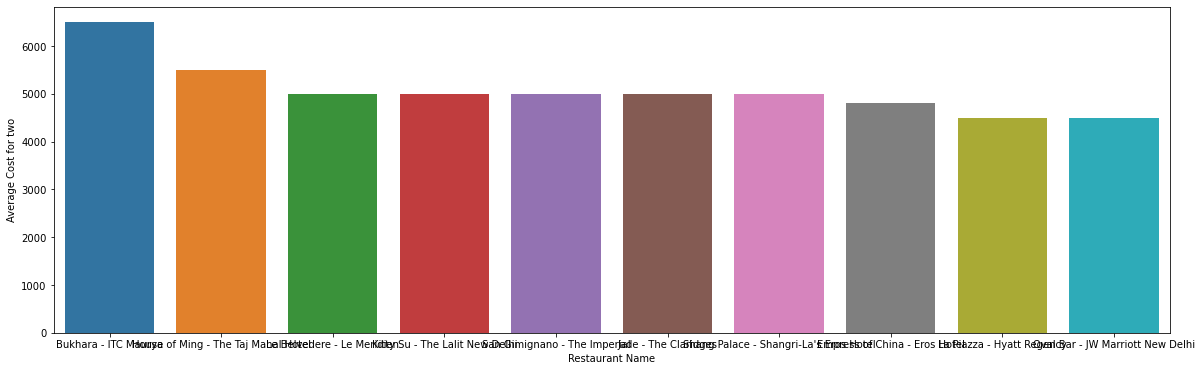

In [34]:
plt.figure(figsize=(20,6))
data = df.sort_values(by="Average Cost for two",ascending=False).iloc[0:10]
sns.barplot(x="Restaurant Name",y="Average Cost for two",data=data)
plt.show()

"Among the listed restaurants, the top 10 with the lowest average cost for two offer budget-friendly dining options for customers. However, it's worth noting that Satoo Hotel and Skye stand out with notably higher average costs for two compared to the rest of the restaurants in this category.

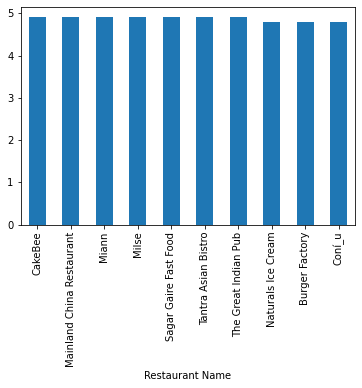

In [35]:
df.groupby('Restaurant Name')['Aggregate rating'].mean().nlargest(10).plot.bar()
plt.show()

### Important Observation: Top-Rated Restaurants

Based on the analysis of restaurant data, the following observations are made regarding the top-rated restaurants with the highest average aggregate ratings:

1. **CakeBee, Mainland China Restaurant, Miann, Milse, Sagar Gaire Fast Food, Tantra Asian Bistro, The Great Indian Pub (All with a rating of 4.9):** These restaurants have achieved an exceptional average aggregate rating of 4.9, indicating outstanding customer satisfaction and likely offering exceptional food and service quality.

2. **Naturals Ice Cream and Burger Factory (Both with a rating of 4.8):** These restaurants also rank among the top-rated, boasting an average aggregate rating of 4.8. This demonstrates their commitment to providing excellent dining experiences.

3. **Coní_u (Rating of 4.8):** Coní_u is another highly-rated restaurant, with an average aggregate rating of 4.8, underscoring its popularity among customers and its consistent delivery of high-quality dining experiences.

These findings underscore the outstanding performance of these restaurants in terms of customer satisfaction, suggesting that they consistently offer exceptional dining experiences and have garnered positive reviews and ratings on the Zomato platform. Customers can expect highly positive dining experiences at these establishments.


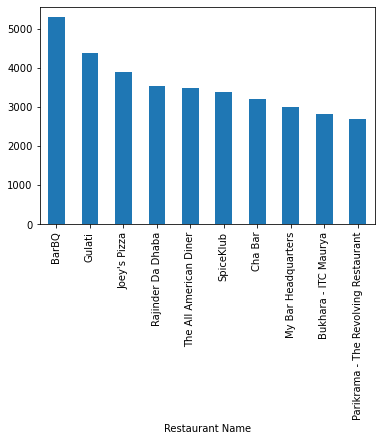

In [36]:
df.groupby('Restaurant Name')['Votes'].mean().nlargest(10).plot.bar()
plt.show()

In [37]:
df.groupby('Restaurant Name')['Votes'].mean().nlargest(10)

Restaurant Name
BarBQ                                   5288.0
Gulati                                  4373.0
Joey's Pizza                            3903.5
Rajinder Da Dhaba                       3530.0
The All American Diner                  3495.0
SpiceKlub                               3370.0
Cha Bar                                 3206.0
My Bar Headquarters                     3010.0
Bukhara - ITC Maurya                    2826.0
Parikrama - The Revolving Restaurant    2689.0
Name: Votes, dtype: float64

#### Important Observation: Top-Rated Restaurants by Number of Votes

Upon analyzing the restaurant data, the following observation is made regarding the top-rated restaurants with the highest average number of votes:

1. **BarBQ (Average Votes: 5288.0):** BarBQ leads the list with the highest average number of votes, indicating a substantial and engaged customer base. Customers have actively reviewed and rated their experiences at this restaurant.

2. **Gulati (Average Votes: 4373.0):** Gulati secures the second spot with a high average number of votes, reflecting its popularity and customer engagement. It is evident that Gulati has garnered significant attention and feedback from patrons.

3. **Joey's Pizza (Average Votes: 3903.5):** Joey's Pizza also ranks prominently with a considerable average number of votes. This suggests that customers have been actively participating in providing feedback and reviews for this pizzeria.

4. **Rajinder Da Dhaba (Average Votes: 3530.0):** Rajinder Da Dhaba maintains a strong presence in the list, with a notable average number of votes. The restaurant has likely received substantial customer feedback and ratings.

5. **The All American Diner (Average Votes: 3495.0):** The All American Diner is another restaurant with a high average number of votes, indicating a loyal customer base that has actively shared their experiences.

6. **SpiceKlub (Average Votes: 3370.0):** SpiceKlub's presence in the top-rated list suggests that it has received substantial customer engagement and reviews, contributing to its popularity.

7. **Cha Bar (Average Votes: 3206.0):** Cha Bar, known for its tea and snacks, has also garnered a high average number of votes, showcasing its appeal to customers.

8. **My Bar Headquarters (Average Votes: 3010.0):** My Bar Headquarters secures its position in the list with a significant average number of votes, indicating active customer participation in reviewing their experiences.

9. **Bukhara - ITC Maurya (Average Votes: 2826.0):** Bukhara, located at ITC Maurya, maintains a strong presence with a substantial average number of votes, highlighting its popularity among diners.

10. **Parikrama - The Revolving Restaurant (Average Votes: 2689.0):** Parikrama, the revolving restaurant, completes the top 10 list with a noteworthy average number of votes. The unique dining experience it offers has likely garnered customer feedback and attention.

These findings underscore the popularity and engagement of these top-rated restaurants, as evidenced by their high average number of votes. Customers have actively shared their opinions and experiences, contributing to the restaurant's ratings and reputation.


In [38]:
rating=df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating count'})


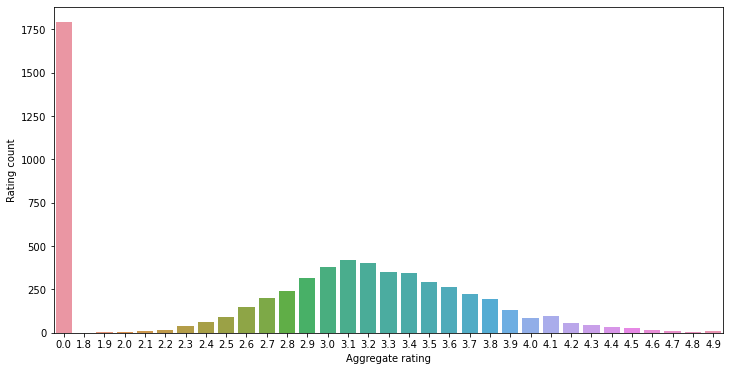

In [39]:
plt.figure(figsize=(12,6))
sns.barplot(x='Aggregate rating',y='Rating count',data=rating)
plt.show()

- When rating is between 4.5 to 4.9-----> Excellent
- When rating is between 4.0 to 3.4-----> Very good
- When rating is between 3.5 to 3.9-----> Good
- When rating is between 2.5 to 2.9-----> Average
- When rating is between 2.0 to 2.4-----> Poor

And 0 rating given by many people

In [40]:
df.head()

,Country Code,Country,Restaurant Name,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,Jahanpanah,Agra,78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,3,3.9,Yellow,Good,140
1,1,India,Rangrezz Restaurant,Agra,0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,2,3.5,Yellow,Good,71
2,1,India,Time2Eat - Mama Chicken,Agra,78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,2,3.6,Yellow,Good,94
4,1,India,Pinch Of Spice,Agra,78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,3,4.2,Green,Very Good,177
6,1,India,Peshawri - ITC Mughal,Agra,78.044095,27.160934,"North Indian, Mughlai",2500,Indian Rupees(Rs.),No,No,No,4,4.3,Green,Very Good,133


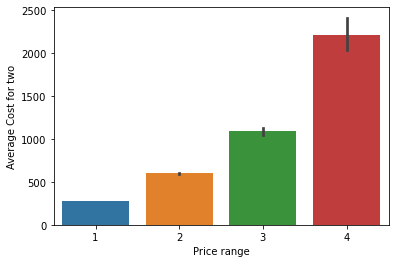

In [41]:
sns.barplot(x='Price range',y='Average Cost for two',data=df)
plt.show()

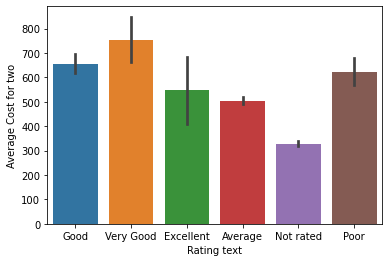

In [42]:
#BARPLOT B/W Rating text AND Average Cost for two
sns.barplot(x='Rating text',y='Average Cost for two',data=df)
plt.show()

In [43]:
# Find the countrries name that has given 0 rating
df[df['Rating color']=='White'].groupby(['Aggregate rating','Country']).size().reset_index()

,Aggregate rating,Country,0
0,0.0,India,1790
1,0.0,United States,1


"It's noticeable from the analysis that a significant number of Indian customers have given 0 ratings to restaurants. This observation raises intriguing questions about the underlying reasons.

One possible explanation could be that some customers may have had negative experiences, such as poor service or food quality, leading them to provide a 0 rating as a form of expression. Alternatively, some customers may choose not to provide any rating, which would also result in a 0 rating in the dataset.

Additionally, cultural factors, local dining habits, or the perception of the rating system might influence Indian customers' rating behaviors. Further investigation and qualitative data could shed light on the motivations behind these 0 ratings.

Overall, this observation underscores the need for a deeper understanding of customer feedback and the cultural nuances that can impact rating patterns on platforms like Zomato."



### Checking Distribution of Numerical features

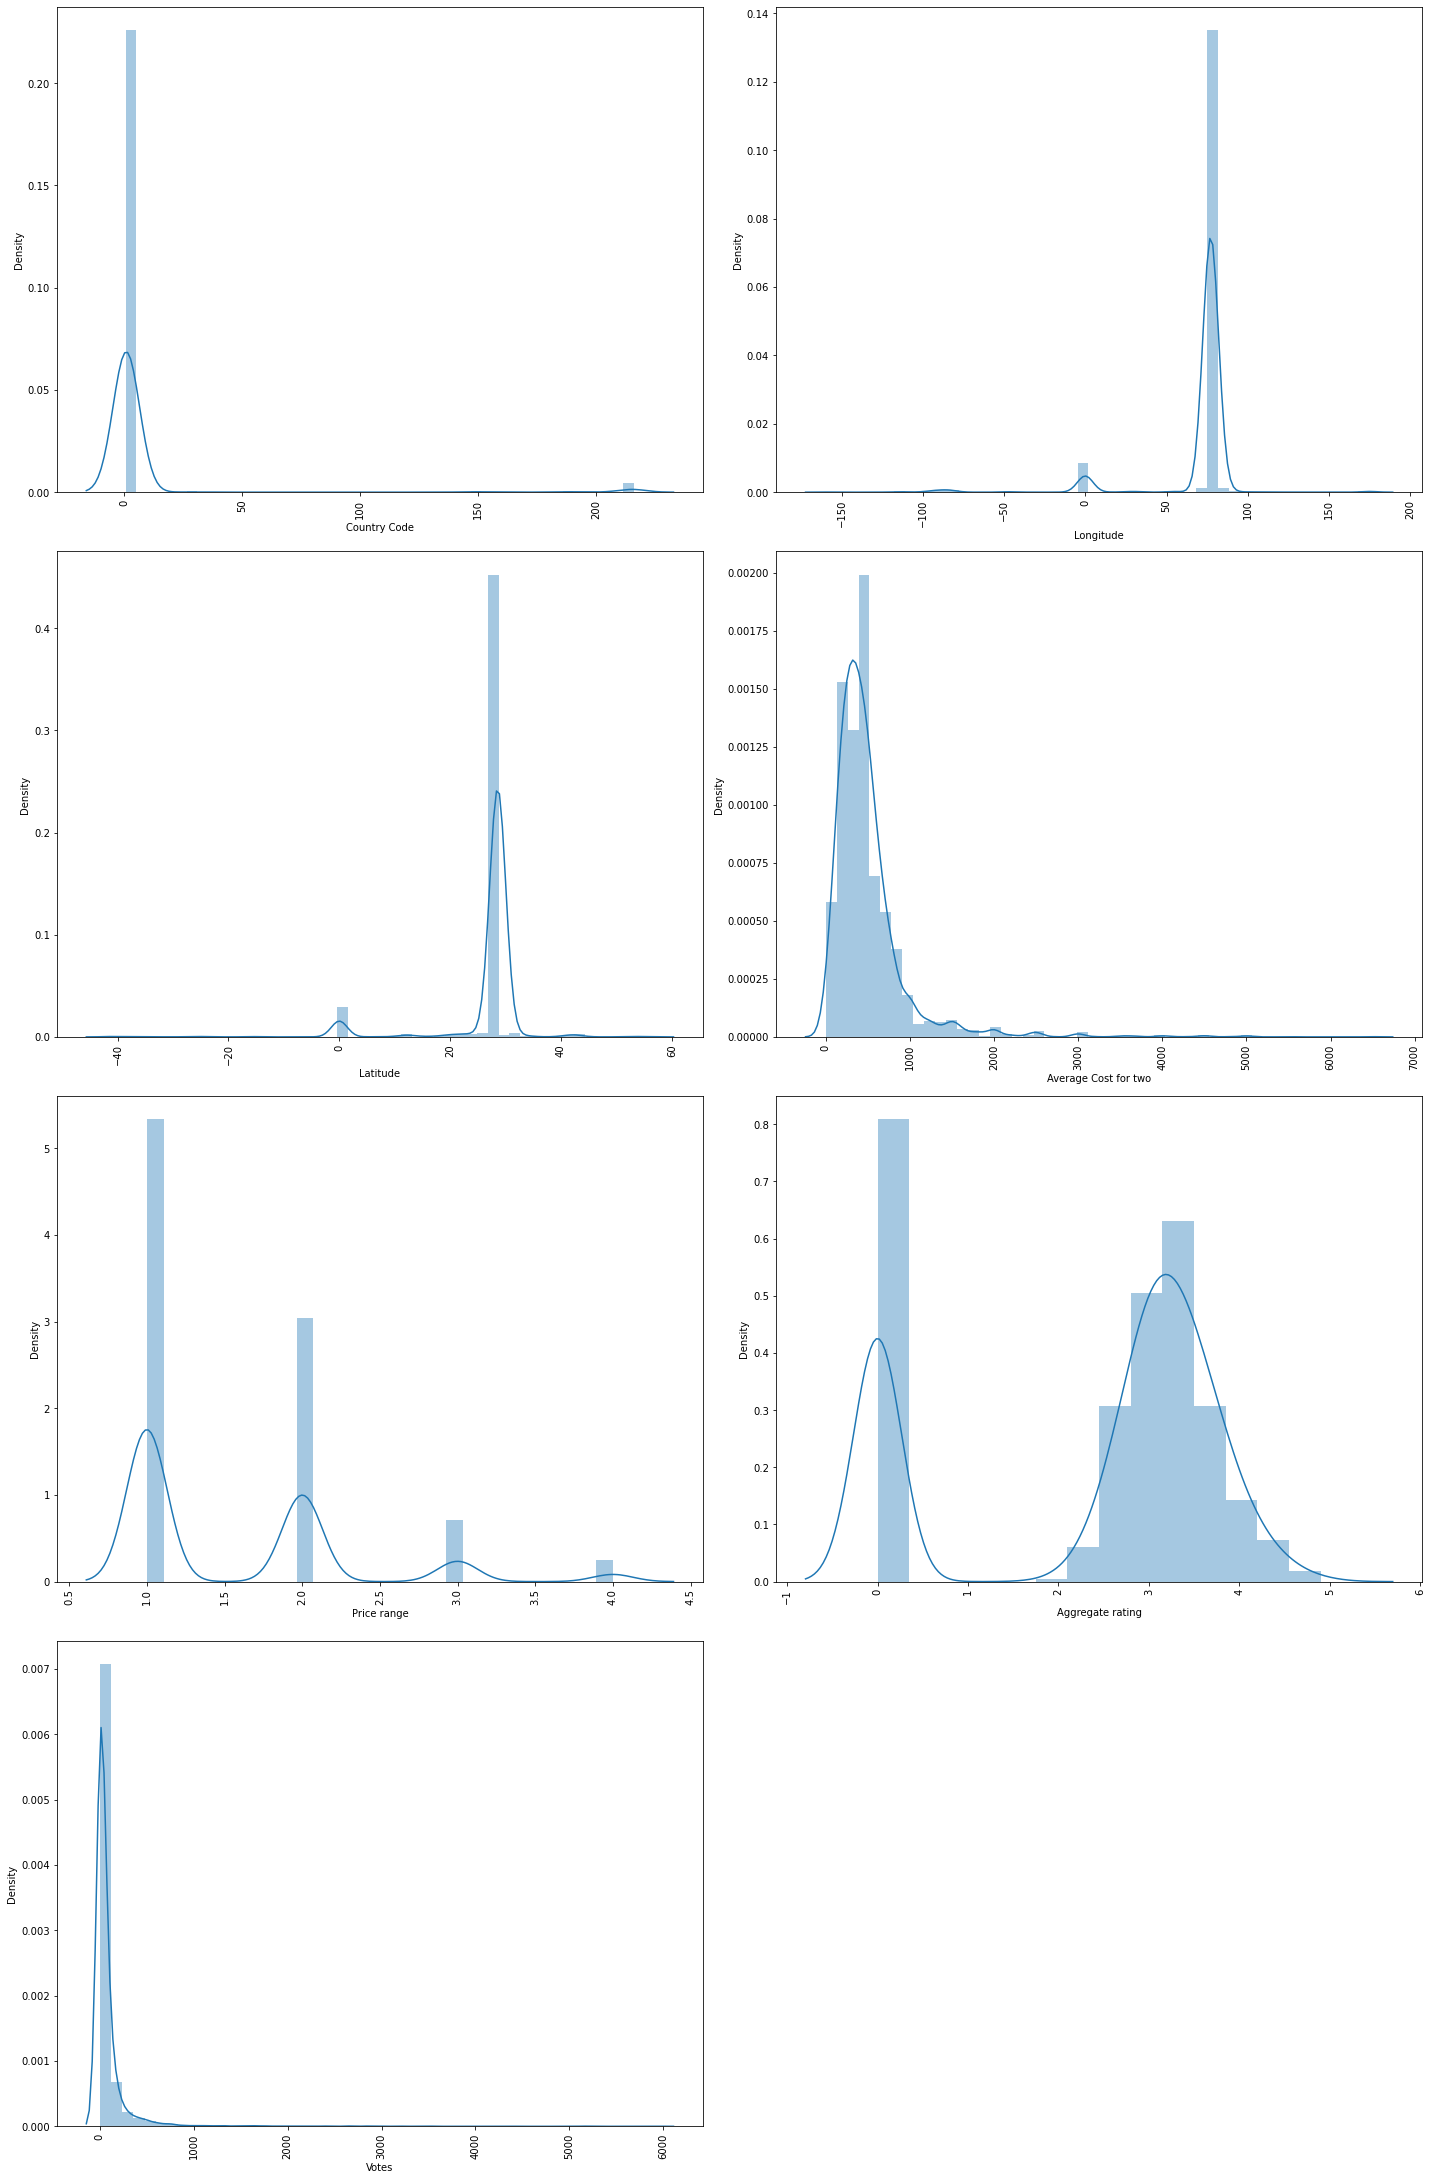

In [44]:
plt.figure(figsize=(20, 60))
for i, col in enumerate(numerical_feature):
    plt.subplot(8, 2, i + 1)
    sns.distplot(df[col])
    plt.xlabel(col)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

numerical_feature are not normally distributed

### Plotting Scatterplot 

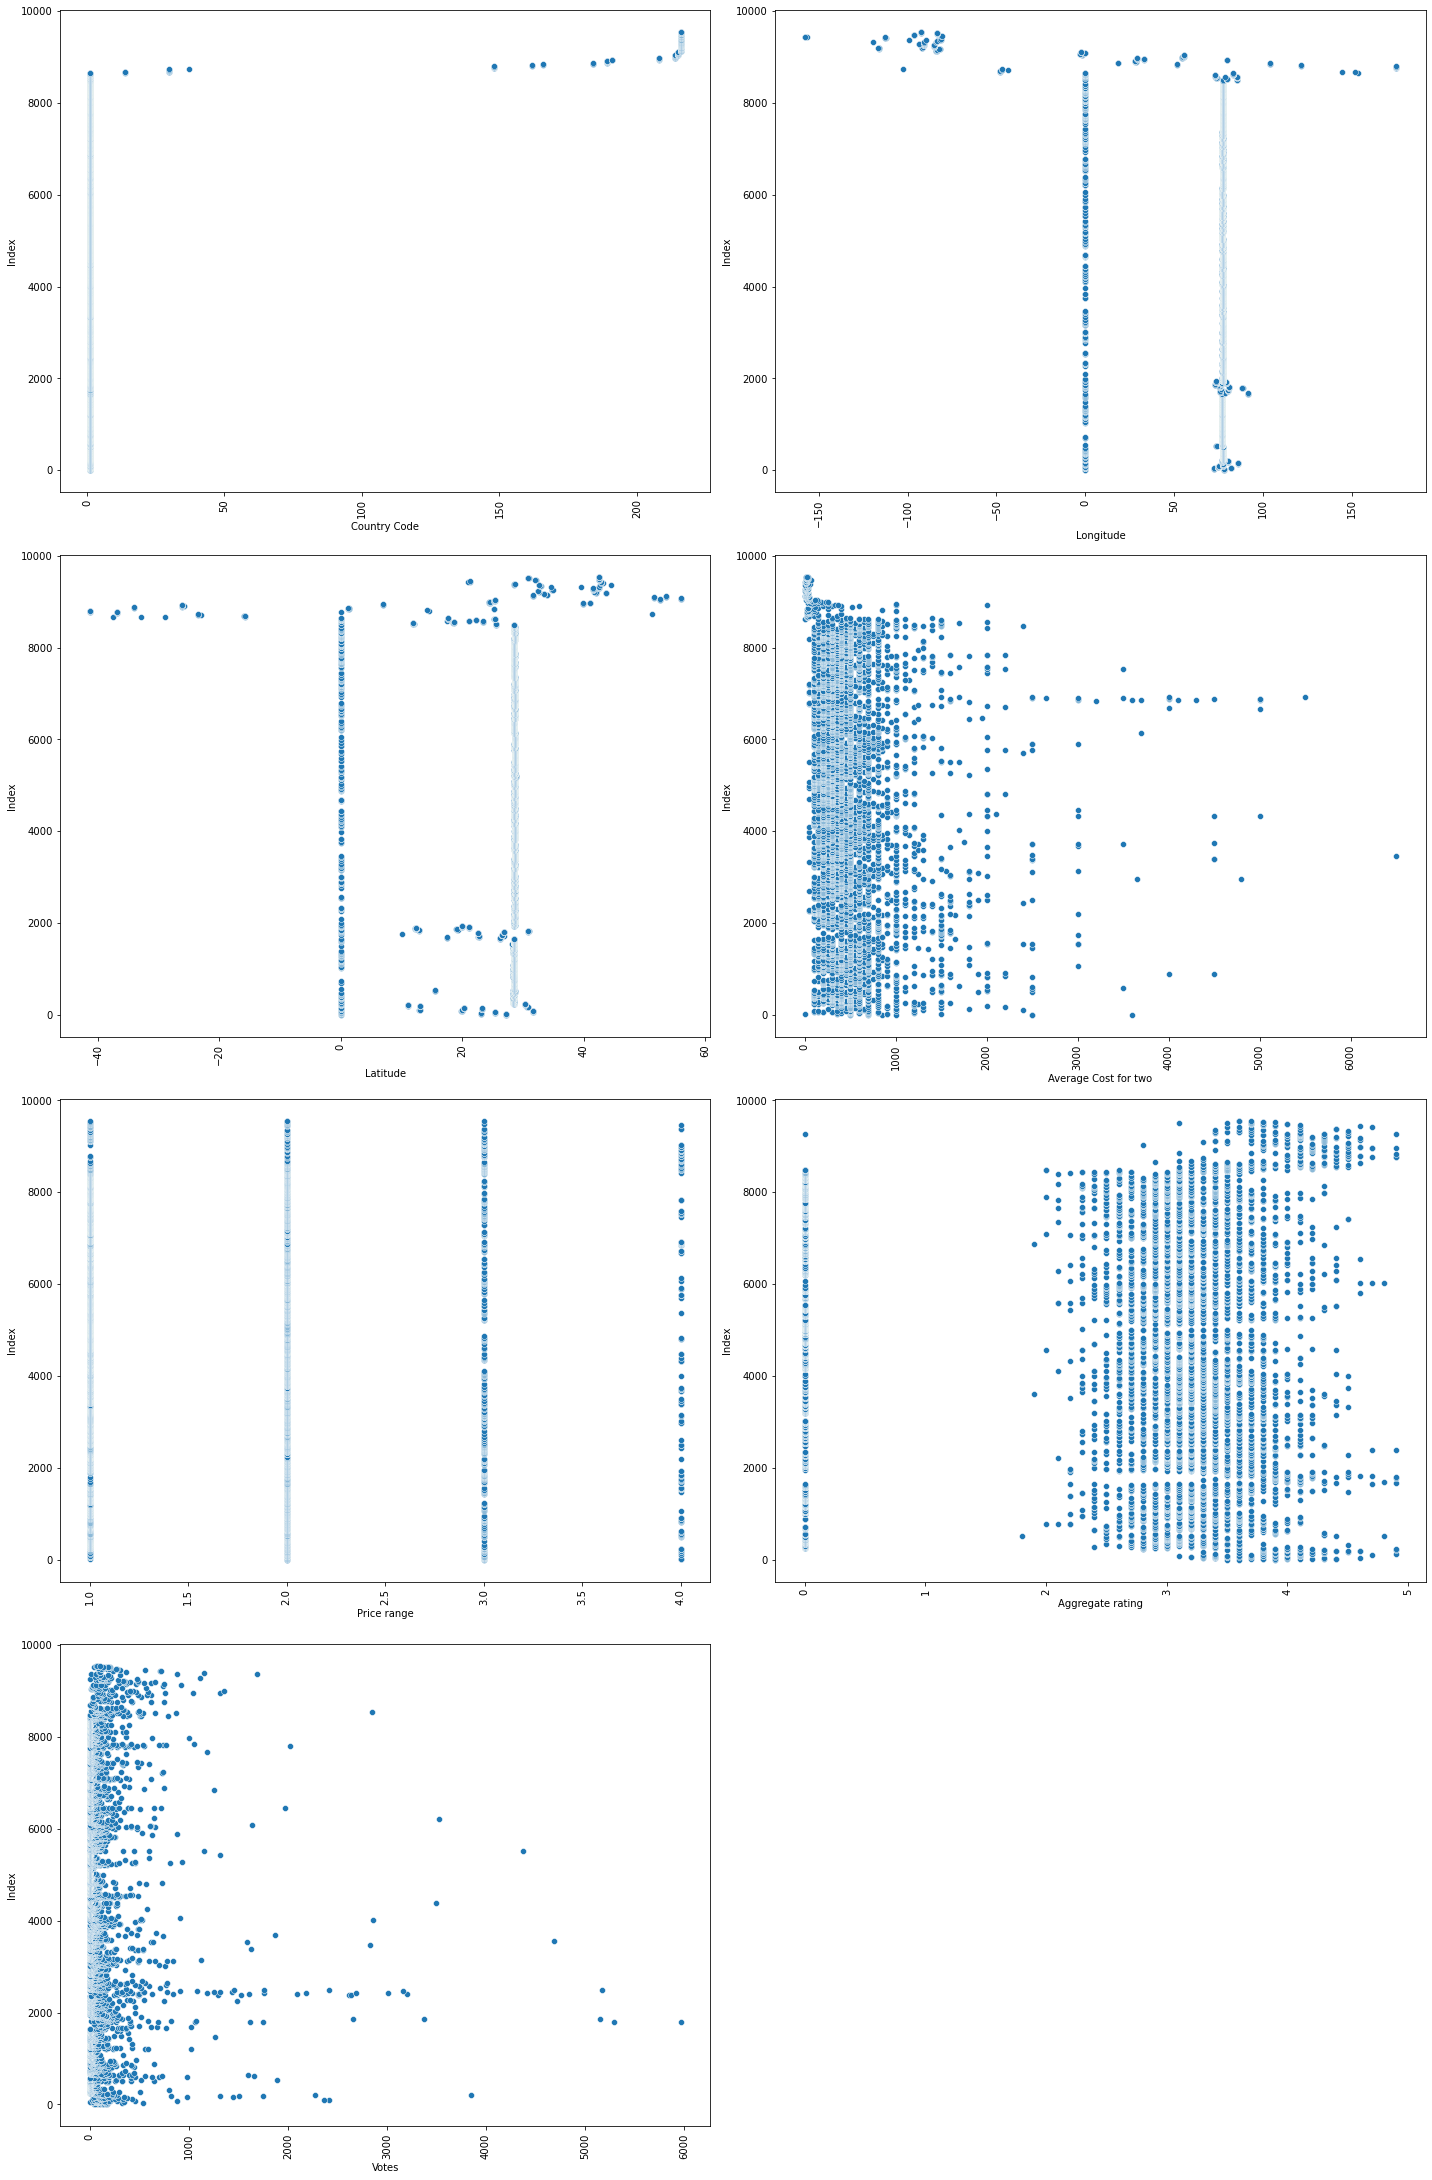

In [45]:
#we are plotting each numerical column against the index (row number) of the DataFrame
plt.figure(figsize=(20, 60))
for i, col in enumerate(numerical_feature):
    plt.subplot(8, 2, i + 1)
    sns.scatterplot(data=df, x=col, y=df.index)
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel('Index')

plt.tight_layout()
plt.show()

numerical_feature are not linearly distributed

### Encoding categorical Feature

In [46]:
# Using Label Encoder on categorical variable
le = LabelEncoder()
for i in categorical_feature:
    df[i] = le.fit_transform(df[i])
df.head()

,Country Code,Country,Restaurant Name,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,3,2027,1,78.011544,27.161661,49,850,4,0,0,0,3,3.9,5,2,140
1,1,3,3373,1,0.000000,0.000000,49,700,4,0,0,0,2,3.5,5,2,71
2,1,3,4440,1,78.011608,27.160832,40,500,4,0,0,0,2,3.6,5,2,94
4,1,3,3123,1,78.007553,27.201725,44,1000,4,0,0,0,3,4.2,1,5,177
6,1,3,3111,1,78.044095,27.160934,49,2500,4,0,0,0,4,4.3,1,5,133


### Handling Outliers

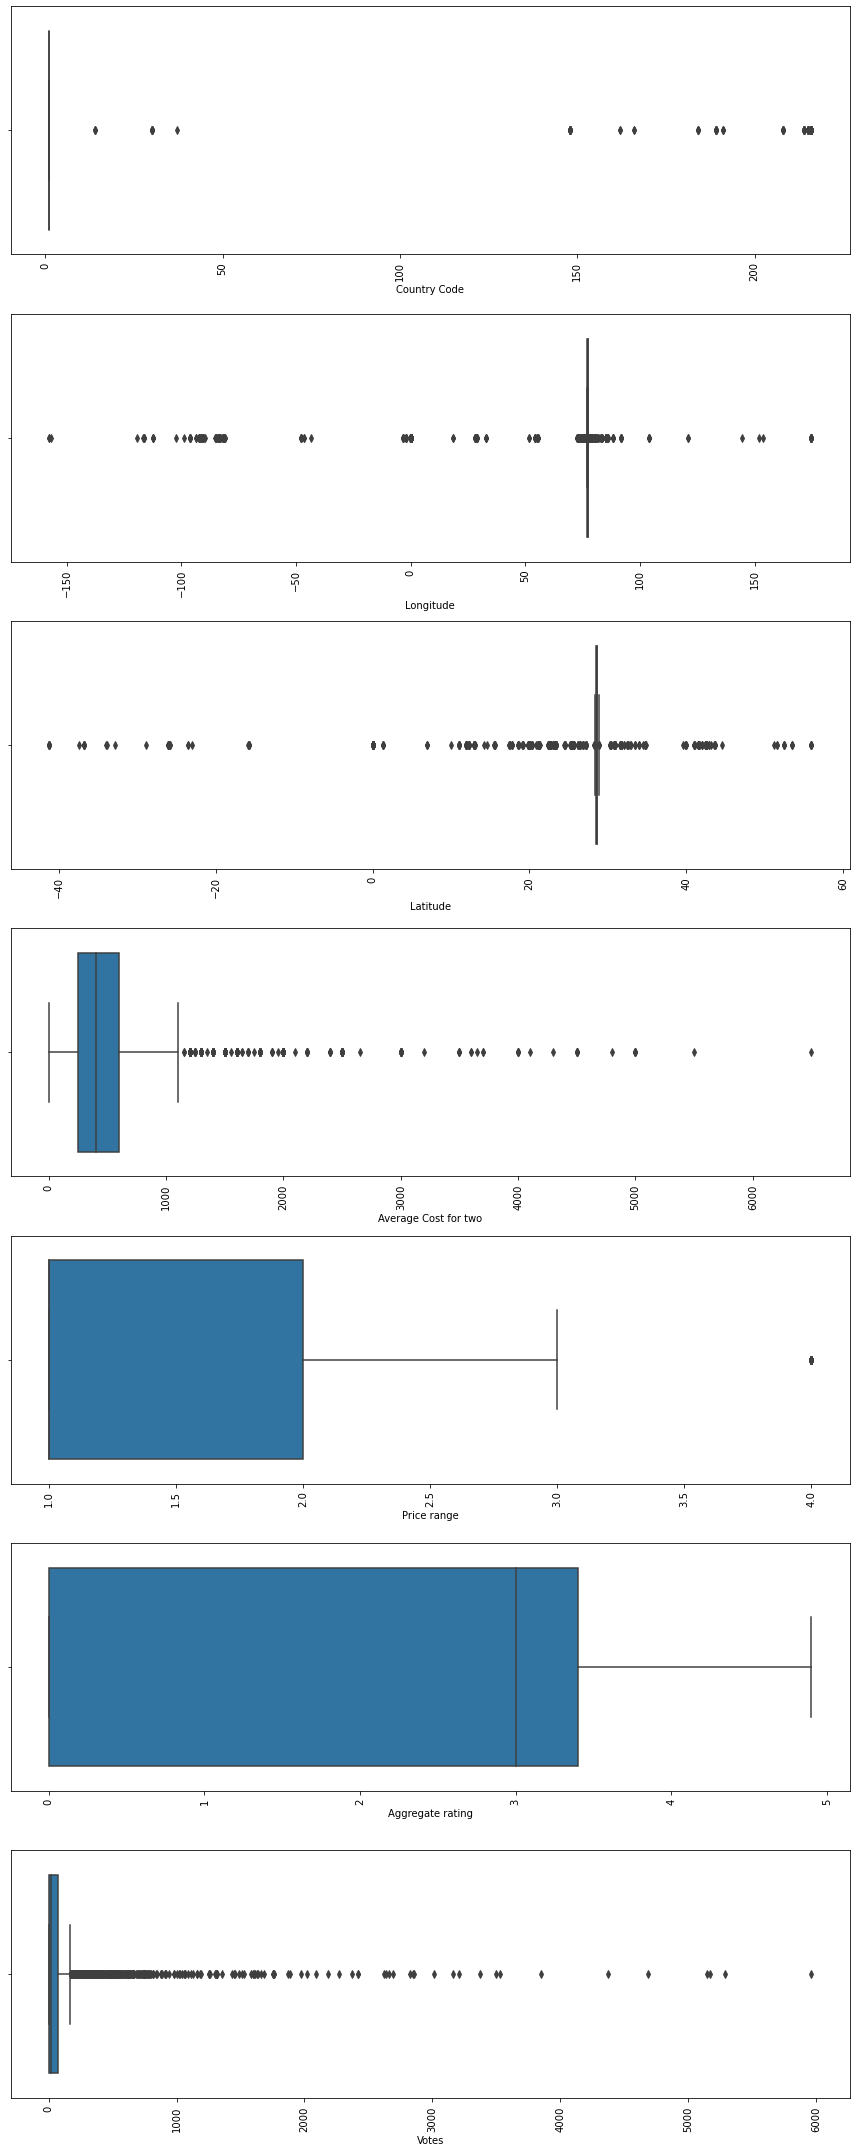

In [47]:
# Create the subplots
fig = plt.figure(figsize=(12, 30))


# Loop through numerical columns and plot count plots
for i, col in enumerate(numerical_feature):
    plt.subplot(7,1 , i + 1)
    sns.boxplot(data=df, x=col,)
    plt.xlabel(col)
    plt.xticks(rotation=90)  # Rotate x-axis tick labels by 90 degrees

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

too many outliers present in the dataset . 

#### Handling Outliers using Z Score

In [48]:
df.shape

(6328, 17)

In [49]:
def remove_outliers_zscore(df, columns, z_threshold=3):
    for column in columns:       # Calculate Z-score for the column
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())   # Remove rows where Z-score exceeds the threshold 
        df = df.drop(df.index[z_scores > z_threshold])
    
    return df

In [50]:
df = remove_outliers_zscore(df,df.columns)
df

,Country Code,Country,Restaurant Name,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
229,1,3,4053,26,78.054222,30.332735,41,550,4,0,0,0,3,3.8,5,2,230
230,1,3,4699,26,78.049117,30.328174,13,500,4,0,0,0,3,4.0,1,5,94
234,1,3,1351,26,78.040267,30.319528,49,600,4,0,0,0,3,3.9,5,2,121
242,1,3,2276,33,77.304776,28.490157,41,500,4,0,0,0,2,2.8,2,0,16
243,1,3,3218,33,77.305563,28.490137,40,150,4,0,0,0,1,2.8,2,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8621,1,3,1064,85,83.001801,25.290468,40,800,4,0,0,0,3,3.3,2,0,96
8623,1,3,2653,85,82.982869,25.270943,16,600,4,0,0,0,3,3.5,5,2,172
8624,1,3,648,85,82.987294,25.334362,48,350,4,0,0,0,2,3.4,2,0,96
8625,1,3,4081,85,82.989291,25.332909,49,600,4,0,0,0,3,3.6,5,2,63


### checking the skewness of the data

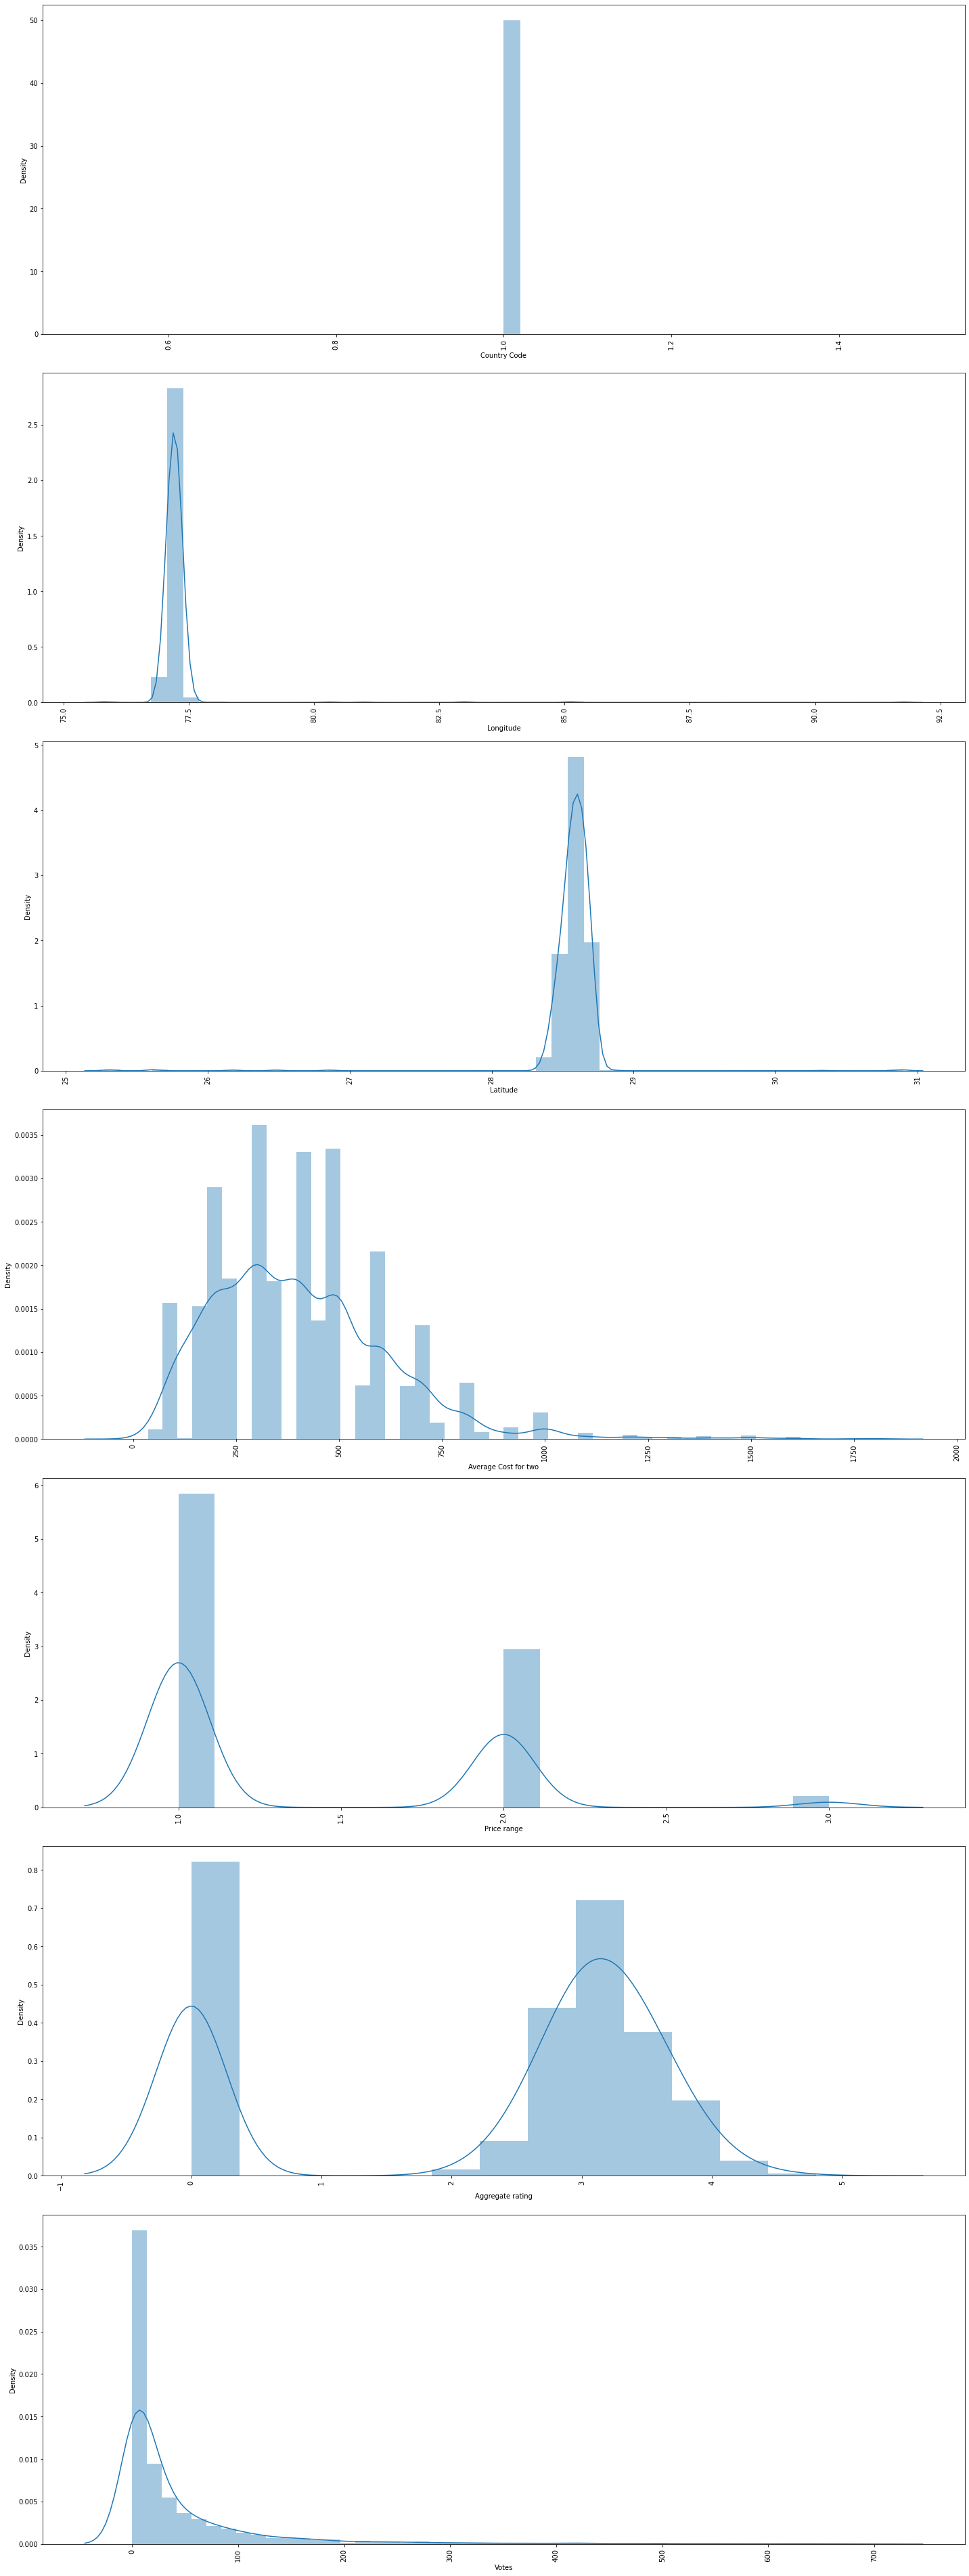

In [51]:
plt.figure(figsize=(20, 60))
for i, col in enumerate(numerical_feature):
    plt.subplot(8, 1, i + 1)
    sns.distplot(df[col])
    plt.xlabel(col)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [52]:
# using log transformation to remove skewness from the votes
df['Votes'] = np.log1p(df['Votes'])

### saving Cleaned Csv File

In [53]:
df.to_csv('cleaned_zomato_data.csv', index=False)

### Checking Correlation with Target Column

In [54]:
#correlation with target column
correlation_with_quality = df.corr()['Average Cost for two'].abs().sort_values(ascending=False)
print(correlation_with_quality)

Average Cost for two    1.000000
Price range             0.850466
Votes                   0.406816
Aggregate rating        0.302407
Has Online delivery     0.301311
Rating text             0.118221
Rating color            0.105481
City                    0.082853
Longitude               0.059673
Latitude                0.058831
Restaurant Name         0.037249
Cuisines                0.034477
Country Code                 NaN
Country                      NaN
Currency                     NaN
Has Table booking            NaN
Is delivering now            NaN
Name: Average Cost for two, dtype: float64


<AxesSubplot:>

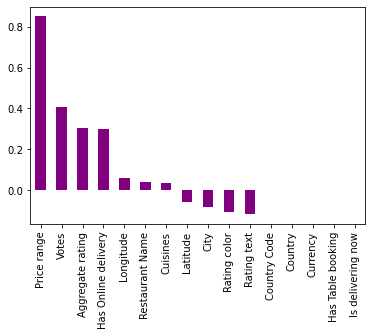

In [55]:
df.corr()['Average Cost for two'].drop(['Average Cost for two']).sort_values(ascending=False).plot(kind='bar', color='purple')

In [57]:
unnecessary_column = ['Is delivering now','Has Table booking','Currency','Country','Country Code']

df.drop(unnecessary_column,axis=1,inplace=True)

### Checking Correlation between columns to columns

In [58]:
#schecking correlation
df_corr = df.corr()
df_corr

,Restaurant Name,City,Longitude,Latitude,Cuisines,Average Cost for two,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
Restaurant Name,1.000000,0.005816,0.020703,-0.017800,0.050336,0.037249,0.037985,0.051248,-0.000493,-0.000690,0.012054,0.010261
City,0.005816,1.000000,0.039406,0.152610,0.045959,-0.082853,-0.031601,-0.083516,-0.025254,0.022206,0.006591,-0.016937
Longitude,0.020703,0.039406,1.000000,-0.764148,-0.009861,0.059673,-0.042251,0.112326,0.063686,-0.022889,0.034366,0.089057
Latitude,-0.017800,0.152610,-0.764148,1.000000,0.027837,-0.058831,0.007410,-0.109751,-0.047878,0.023161,-0.021938,-0.069681
Cuisines,0.050336,0.045959,-0.009861,0.027837,1.000000,0.034477,-0.050515,0.060898,-0.039658,-0.070632,-0.043465,-0.029559
Average Cost for two,0.037249,-0.082853,0.059673,-0.058831,0.034477,1.000000,0.301311,0.850466,0.302407,-0.105481,-0.118221,0.406816
Has Online delivery,0.037985,-0.031601,-0.042251,0.007410,-0.050515,0.301311,1.000000,0.284750,0.333748,-0.051227,-0.102683,0.442354
Price range,0.051248,-0.083516,0.112326,-0.109751,0.060898,0.850466,0.284750,1.000000,0.259518,-0.081725,-0.092515,0.366162
Aggregate rating,-0.000493,-0.025254,0.063686,-0.047878,-0.039658,0.302407,0.333748,0.259518,1.000000,-0.399139,-0.615586,0.846379
Rating color,-0.000690,0.022206,-0.022889,0.023161,-0.070632,-0.105481,-0.051227,-0.081725,-0.399139,1.000000,0.671061,-0.204182


In [59]:
# df.drop('Price range',axis=1,inplace=True)

### VIF

In [60]:
df1=df.copy()

In [61]:
#drop target column
df1.drop('Average Cost for two',axis=1, inplace=True)

In [62]:
#scaling data
sc=StandardScaler()
standard=sc.fit_transform(df1)

In [63]:
standard=pd.DataFrame(standard, columns=df1.columns)

In [64]:
VIF= pd.DataFrame()
VIF['features']= standard.columns
VIF['vif']=[variance_inflation_factor(standard.values,i) for i in range(len(standard.columns))]
VIF

,features,vif
0,Restaurant Name,1.006723
1,City,1.100828
2,Longitude,2.609657
3,Latitude,2.619625
4,Cuisines,1.028012
5,Has Online delivery,1.300751
6,Price range,1.225298
7,Aggregate rating,5.761747
8,Rating color,1.852794
9,Rating text,2.678128


###### There is no Multicollinearty we are good to go For Prediction

# 1. Predicting 'Average Cost for two'

### Splitting into Feature and Target column

In [65]:
x= df.drop('Average Cost for two', axis=1)
y=df['Average Cost for two']

### Standardization

In [66]:
sc=StandardScaler()

In [67]:
x=sc.fit_transform(x)

In [68]:
x

array([[ 1.27396382, -3.37946669,  1.18894924, ...,  1.57992276,
         0.39508671,  1.69421118],
       [ 1.74745316, -3.37946669,  1.18135475, ..., -1.68243377,
         2.40590906,  1.17110503],
       [-0.70648231, -3.37946669,  1.16818848, ...,  1.57992276,
         0.39508671,  1.31837113],
       ...,
       [-1.22175012,  2.84582949,  8.52767217, ..., -0.86684464,
        -0.94546152,  1.18337057],
       [ 1.29448658,  2.84582949,  8.53064256, ...,  1.57992276,
         0.39508671,  0.93856232],
       [ 1.64483937,  2.84582949,  8.5342185 , ...,  1.57992276,
         0.39508671,  1.25741415]])

## Model Building

### Find best Randomstate

In [69]:
maxaccu=0
maxRS=0

for i in range(0,200):
    X_train,X_test,Y_train,Y_test= train_test_split(x,y,random_state=i,test_size=.25)
    LR= LinearRegression()
    LR.fit(X_train,Y_train)
    pred= LR.predict(X_test)
    acc=r2_score(Y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.7654582618481489 on Random State = 64


In [70]:
X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=.25,random_state=maxRS)

### Defining All Regression Models

In [71]:
# Create instances of regression models
LR_model = LinearRegression()
RFR_model = RandomForestRegressor()
GB_model = GradientBoostingRegressor()
ADA_model = AdaBoostRegressor()
DT_model = DecisionTreeRegressor()
KNR_model = KNeighborsRegressor()

# Create a list of regression models
model = [LR_model, RFR_model, GB_model, ADA_model, DT_model, KNR_model]

In [72]:
for reg_model in model:
    reg_model.fit(X_train, Y_train)
    train_pred = reg_model.predict(X_train)
    test_pred = reg_model.predict(X_test)
    
    # R-squared (Coefficient of Determination)
    r2_train = r2_score(Y_train, train_pred)
    r2_test = r2_score(Y_test, test_pred)
    
    # Mean Squared Error (MSE)
    mse_train = mean_squared_error(Y_train, train_pred)
    mse_test = mean_squared_error(Y_test, test_pred)
    
    # Mean Absolute Error (MAE)
    mae_train = mean_absolute_error(Y_train, train_pred)
    mae_test = mean_absolute_error(Y_test, test_pred)
    
    print('Model:', reg_model)
    print('R-squared (Train):', r2_train)
    print('R-squared (Test):', r2_test)
    print('Mean Squared Error (MSE) - Train:', mse_train)
    print('Mean Squared Error (MSE) - Test:', mse_test)
    print('Mean Absolute Error (MAE) - Train:', mae_train)
    print('Mean Absolute Error (MAE) - Test:', mae_test)
    print('*' * 30)

Model: LinearRegression()
R-squared (Train): 0.7262821248845235
R-squared (Test): 0.7654582618481489
Mean Squared Error (MSE) - Train: 12378.75899125304
Mean Squared Error (MSE) - Test: 11621.946949256448
Mean Absolute Error (MAE) - Train: 89.92945213638075
Mean Absolute Error (MAE) - Test: 87.33376828156004
******************************
Model: RandomForestRegressor()
R-squared (Train): 0.974575848974085
R-squared (Test): 0.8324135614729743
Mean Squared Error (MSE) - Train: 1149.794977672708
Mean Squared Error (MSE) - Test: 8304.196572104018
Mean Absolute Error (MAE) - Train: 25.604255319148933
Mean Absolute Error (MAE) - Test: 70.73498817966903
******************************
Model: GradientBoostingRegressor()
R-squared (Train): 0.8373552282102636
R-squared (Test): 0.8285578737175021
Mean Squared Error (MSE) - Train: 7355.531421991004
Mean Squared Error (MSE) - Test: 8495.25253894427
Mean Absolute Error (MAE) - Train: 68.91295354553637
Mean Absolute Error (MAE) - Test: 73.760546513897

### CrossValidation

In [73]:
for reg_model in model:
    reg_model.fit(X_train, Y_train)
    r2_test = r2_score(Y_test, reg_model.predict(X_test))
    
    cv_r2 = cross_val_score(reg_model, x, y, cv=5, scoring='r2').mean()
    
    print('Model:', reg_model)
    print('R-squared (Test):', r2_test)
    print(f'Cross-validation R-squared:', cv_r2)
    print('*' * 50)

Model: LinearRegression()
R-squared (Test): 0.7654582618481489
Cross-validation R-squared: 0.631433886614151
**************************************************
Model: RandomForestRegressor()
R-squared (Test): 0.8294817524293606
Cross-validation R-squared: 0.8050361645163588
**************************************************
Model: GradientBoostingRegressor()
R-squared (Test): 0.8286125633409777
Cross-validation R-squared: 0.7953570228841164
**************************************************
Model: AdaBoostRegressor()
R-squared (Test): 0.7387331380007107
Cross-validation R-squared: 0.7208784715001502
**************************************************
Model: DecisionTreeRegressor()
R-squared (Test): 0.6823323874674361
Cross-validation R-squared: 0.6536120917514576
**************************************************
Model: KNeighborsRegressor()
R-squared (Test): 0.7236581046916091
Cross-validation R-squared: 0.7140216153306846
**************************************************


#### GradientBoostingRegressor is beast model

###### Hyperparameter tuning on GradientBoostingRegressor

In [74]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0]
}
param_grid

{'n_estimators': [50, 100, 150],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [3, 4, 5],
 'min_samples_split': [2, 3, 4],
 'min_samples_leaf': [1, 2, 3],
 'subsample': [0.8, 0.9, 1.0]}

In [75]:
grid_search=GridSearchCV(estimator=GB_model,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)
grid_search.fit(X_train,Y_train)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 0.9, 1.0]},
             verbose=2)

In [76]:
grid_search.best_estimator_

GradientBoostingRegressor(max_depth=5, n_estimators=150, subsample=0.9)

In [77]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150,
 'subsample': 0.9}

In [78]:
GCV_pred=grid_search.best_estimator_.predict(X_test)
r2_score(Y_test,GCV_pred)

0.8360318474590029

### Saving the Model

In [79]:
file_path = 'Average_Cost_for_two.pkl'
with open(file_path, 'wb') as file:
    # Use the pickle.dump() method to save the object to the file
    pickle.dump(grid_search.best_estimator_, file)

# 2.Predicting Price range

In [80]:
# loading cleaned csv

In [81]:
data = pd.read_csv('cleaned_zomato_data.csv')

In [82]:
data.head()

,Country Code,Country,Restaurant Name,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,3,4053,26,78.054222,30.332735,41,550,4,0,0,0,3,3.8,5,2,5.442418
1,1,3,4699,26,78.049117,30.328174,13,500,4,0,0,0,3,4.0,1,5,4.553877
2,1,3,1351,26,78.040267,30.319528,49,600,4,0,0,0,3,3.9,5,2,4.804021
3,1,3,2276,33,77.304776,28.490157,41,500,4,0,0,0,2,2.8,2,0,2.833213
4,1,3,3218,33,77.305563,28.490137,40,150,4,0,0,0,1,2.8,2,0,2.197225


### Checking Correlation with Target Column

In [83]:
#correlation with target column
correlation_with_quality = data.corr()['Price range'].abs().sort_values(ascending=False)
print(correlation_with_quality)

Price range             1.000000
Average Cost for two    0.850466
Votes                   0.366162
Has Online delivery     0.284750
Aggregate rating        0.259518
Longitude               0.112326
Latitude                0.109751
Rating text             0.092515
City                    0.083516
Rating color            0.081725
Cuisines                0.060898
Restaurant Name         0.051248
Country Code                 NaN
Country                      NaN
Currency                     NaN
Has Table booking            NaN
Is delivering now            NaN
Name: Price range, dtype: float64


<AxesSubplot:>

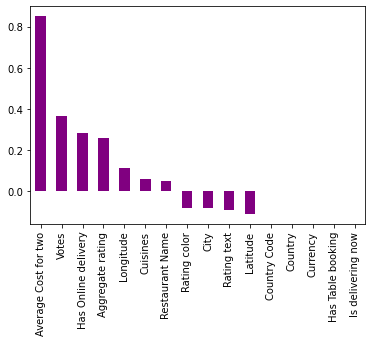

In [84]:
data.corr()['Price range'].drop(['Price range']).sort_values(ascending=False).plot(kind='bar', color='purple')

In [85]:
unnecessary_features = ['Is delivering now','Has Table booking','Currency','Country','Country Code']

data.drop(unnecessary_features,axis=1,inplace=True)

### VIF

In [86]:
df2=data.copy()

In [87]:
#drop target column
df2.drop('Price range',axis=1, inplace=True)

In [88]:
#scaling data
sc=StandardScaler()
standard=sc.fit_transform(df2)

In [89]:
standard=pd.DataFrame(standard, columns=df2.columns)

In [90]:
VIF= pd.DataFrame()
VIF['features']= standard.columns
VIF['vif']=[variance_inflation_factor(standard.values,i) for i in range(len(standard.columns))]
VIF

,features,vif
0,Restaurant Name,1.005892
1,City,1.100877
2,Longitude,2.603837
3,Latitude,2.619572
4,Cuisines,1.024138
5,Average Cost for two,1.253532
6,Has Online delivery,1.298979
7,Aggregate rating,5.753163
8,Rating color,1.856432
9,Rating text,2.678654


###### There is no Multicollinearty we are good to go For Prediction

### Splitting into Feature and Target column

In [91]:
X= data.drop('Price range', axis=1)
Y=data['Price range']

### Standardization

In [92]:
sc=StandardScaler()

In [93]:
X=sc.fit_transform(X)

### Data Balancing

In [94]:
sm=SMOTE()

In [95]:
x,y=sm.fit_resample(X,Y)

In [96]:
x.shape , y.shape

((9888, 11), (9888,))

### Model Building

#### Model Building

In [97]:
maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.993933265925177 on Random State = 148


In [98]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=maxRS)

### Defining All Classification Models

In [99]:
LR_model= LogisticRegression()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
SGD_model= SGDClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,DT_model,SV_model,KNR_model,RFR_model,SGD_model,ADA_model,GB_model ]

### Model training

In [100]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*30)

Accuracy_Score of  LogisticRegression() is 99.3933265925177
Confusion Matrix of  LogisticRegression()  is 
 [[687   1   0]
 [  0 636   4]
 [  0   7 643]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       688
           2       0.99      0.99      0.99       640
           3       0.99      0.99      0.99       650

    accuracy                           0.99      1978
   macro avg       0.99      0.99      0.99      1978
weighted avg       0.99      0.99      0.99      1978

******************************
Accuracy_Score of  DecisionTreeClassifier() is 99.89888776541962
Confusion Matrix of  DecisionTreeClassifier()  is 
 [[688   0   0]
 [  0 638   2]
 [  0   0 650]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       688
           2       1.00      1.00      1.00       640
           3       1.00      1.00      1.00       650

    accuracy                           1.00      1978

### CrossValidation

In [101]:
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,x,y,cv=5, scoring='accuracy').mean()*100)
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 99.3933265925177
cross Validation accuracy score of  LogisticRegression()  is  98.4527628905313
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 99.89888776541962
cross Validation accuracy score of  DecisionTreeClassifier()  is  99.82807340021982
**************************************************
Accuracy_Score of  SVC() is 99.59555106167846
cross Validation accuracy score of  SVC()  is  99.1404334886585
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 96.66329625884732
cross Validation accuracy score of  KNeighborsClassifier()  is  93.33632015907916
**************************************************
Accuracy_Score of  RandomForestClassifier() is 99.94944388270982
cross Validation accuracy score of  RandomForestClassifier()  is  99.85843264273217
**************************************************
Accuracy_Score of  SGDClassifier() is 99.191102123356

##### GradientBoostingClassifier gave best accuracy score and minimum difference for generalise model

###### Hyperparameter tuning on GradientBoostingClassifier

In [102]:
param_grid = {
    'n_estimators': [200, 600, 1000],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [3, 4, 5], 
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 4, 7]
}
param_grid

{'n_estimators': [200, 600, 1000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [3, 4, 5],
 'min_samples_split': [2, 3],
 'min_samples_leaf': [1, 4, 7]}

In [103]:
grid_search=GridSearchCV(estimator=GB_model,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 4, 7],
                         'min_samples_split': [2, 3],
                         'n_estimators': [200, 600, 1000]},
             verbose=2)

In [104]:
grid_search.best_estimator_

GradientBoostingClassifier(max_depth=4, max_features='auto', n_estimators=200)

In [105]:
GCV_pred=grid_search.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.9989888776541962

#### Confusion matrix

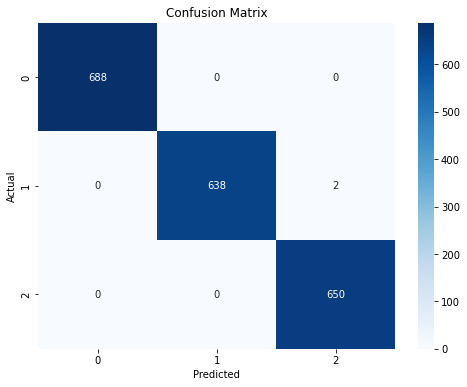

In [106]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
y_pred = grid_search.best_estimator_.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Save Model

In [107]:
file_path = 'Price_range.pkl'
with open(file_path, 'wb') as file:
    # Use the pickle.dump() method to save the object to the file
    pickle.dump(grid_search.best_estimator_, file)

#### Submitted By: Sonali Kotna